In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset-file/mnist.npz


In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
np.random.seed(0)

In [19]:

data = np.load('/kaggle/input/mnist-dataset-file/mnist.npz')
x_train, y_train = data['x_train'], data['y_train']
x_test, y_test = data['x_test'], data['y_test']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


**visualizing examples..**

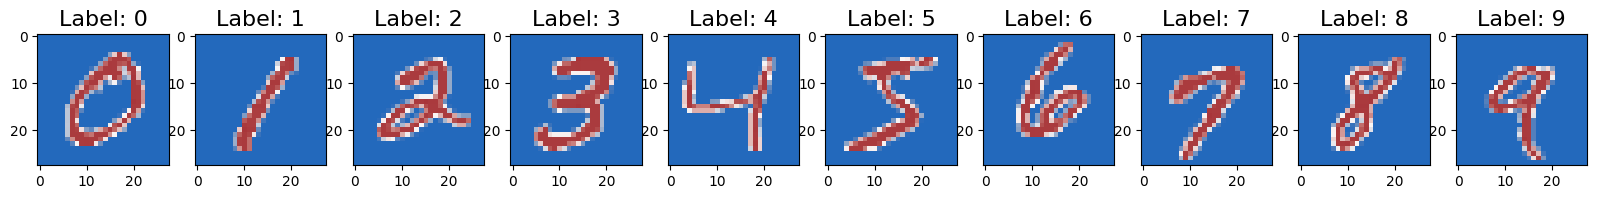

In [20]:
num_classes=10
f,ax = plt.subplots(1,num_classes,figsize=(20,20))

for i in range(num_classes):
    sample=x_train[y_train == i][0]
    ax[i].imshow(sample,cmap='vlag')
    ax[i].set_title("Label: {}".format(i),fontsize=16)

In [21]:
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [22]:
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [23]:
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [24]:
#preparing trhe data

x_train = x_train /255.0
x_test = x_test/255.0

In [25]:
#reshape the data
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)

In [26]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


**Model, fully connected neural network**

In [28]:
model=Sequential()
model.add(Dense(units=128,input_shape=(784,),activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

**train**

In [30]:
batch_size=512
epochs=10
model.fit(x=x_train,y=y_train,batch_size=batch_size,epochs=epochs)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9865 - loss: 0.0444
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9887 - loss: 0.0392
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9901 - loss: 0.0329
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9906 - loss: 0.0310
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9913 - loss: 0.0294
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9935 - loss: 0.0234
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9917 - loss: 0.0252
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9935 - loss: 0.0219
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9946 - loss: 0.0189
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9954 - loss: 0.0167


In [31]:
#Evaluate
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f'Test loss = {test_loss} , Test_accuracy = {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9766 - loss: 0.0909
Test loss = 0.07586958259344101 , Test_accuracy = 0.9797999858856201


In [32]:
y_pred=model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.1355141e-09 3.0138189e-08 7.5415193e-07 ... 9.9994808e-01
  2.2652074e-08 3.2184609e-05]
 [4.0265503e-11 1.5131539e-07 9.9999982e-01 ... 2.3272981e-10
  4.6338462e-09 1.7097721e-14]
 [1.2471780e-08 9.9992877e-01 1.1247492e-05 ... 4.9827526e-05
  3.1972977e-06 1.6827071e-08]
 ...
 [1.6514383e-15 3.9664363e-10 8.1978153e-14 ... 8.1856646e-09
  2.3873063e-11 1.2068454e-06]
 [3.9296344e-10 5.9907768e-10 6.1698747e-13 ... 1.0766238e-11
  1.7102118e-06 1.3561718e-09]
 [2.8252536e-09 1.4187400e-12 6.8450703e-11 ... 8.8203277e-15
  1.1474530e-11 7.1496797e-15]]
[7 2 1 ... 4 5 6]


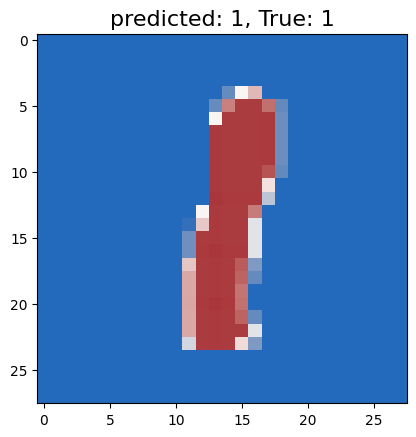

In [35]:
#Example

random_idx=np.random.choice(len(x_test))
x_sample=x_test[random_idx]
y_true=np.argmax(y_test,axis=1)
y_sample_true= y_true[random_idx]
y_sample_pred_class=y_pred_classes[random_idx]

plt.title(f"predicted: {y_sample_pred_class}, True: {y_sample_true}", fontsize=16)
plt.imshow(x_sample.reshape(28,28),cmap='vlag')

**confusion matrix**

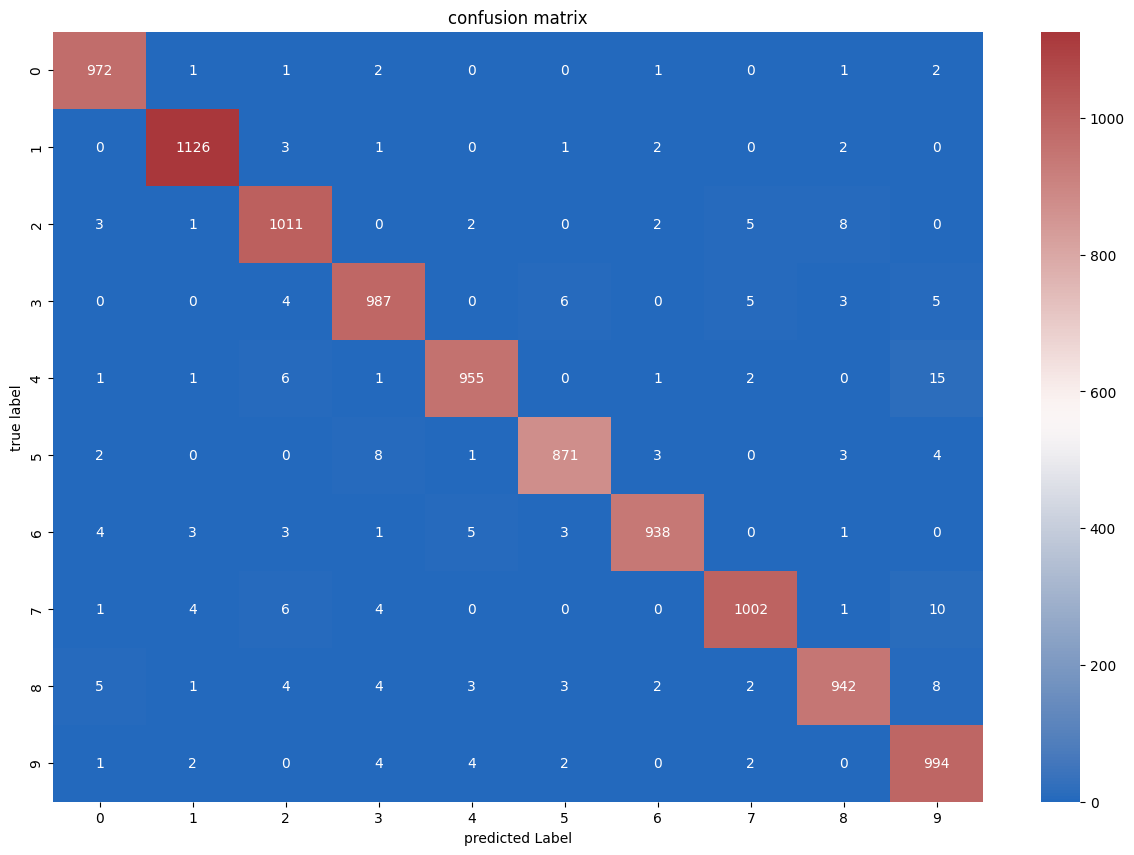

In [38]:
confusion_mtx = confusion_matrix(y_true,y_pred_classes)

fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(confusion_mtx,annot=True,fmt='d',ax=ax,cmap='vlag')
ax.set_xlabel('predicted Label')
ax.set_ylabel('true label')
ax.set_title('confusion matrix');